In [24]:
import pandas as pd

In [25]:
import sys
import os
# Get the parent directory
parent_folder = os.path.dirname(os.getcwd())
#add the parent directory to the Python path so that the scripts can be imported
sys.path.append(parent_folder) 

In [26]:
from modules.point_reg import point_regressor

# Load data

In [27]:
# Load the data
# fname_ams='../data/nl/ams_data_merged_preprocessed.csv'
fname_ams='../data/nl/ams_data_merged_preprocessed.csv'
df_ams=pd.read_csv(fname_ams)

In [28]:
list_of_features = ['total_net_norm','irradiance_norm','zenith_norm', 'azimuth_norm','wind_speed_norm', 'temperature_norm',
                    'precipitation_norm', 'cloud_cover_norm', 'cos_HoD']
list_of_features_selected=['irradiance_norm', 'total_net_norm',"precipitation_norm","temperature_norm","wind_speed_norm"]
my_seed=42

In [29]:
point_reg=point_regressor(original_data=df_ams,list_of_features=list_of_features,random_seed=my_seed,irradiance_threshold=0.01)

X_train.shape: (8232, 9), X_test.shape: (757, 9), X_prop_train.shape: (7328, 9), X_cal.shape: (904, 9)


# Feature Selection

## Sequantial Feature Selection

with sci-kit learn

In [30]:
# point_reg.sequential_selection(direction='forward',n_features=5)

In [31]:
# point_reg.sequential_selection(direction='backward',n_features=5)

In [32]:
# # check the selected features in each iteration
# for i in range(5):
#     point_reg.sequential_selection(direction='forward',n_features=i+1)
#     print(f'Forward selection: {point_reg.forward_selected_features[i]}')
# for i in range(5):
#     point_reg.sequential_selection(direction='backward',n_features=i+1)
#     print(f'Backward selection: {point_reg.backward_selected_features[i]}')

with mlxtend, which provides better interface for selection details

In [33]:
# point_reg.sequential_selection_mlxtend(direction='forward',n_features=9)

In [34]:
# point_reg.sequential_selection_mlxtend(direction='backward',n_features=1)

## Tree-based Feature Selection



### Based on MDI
Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree. \
https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#feature-importance-based-on-mean-decrease-in-impurity

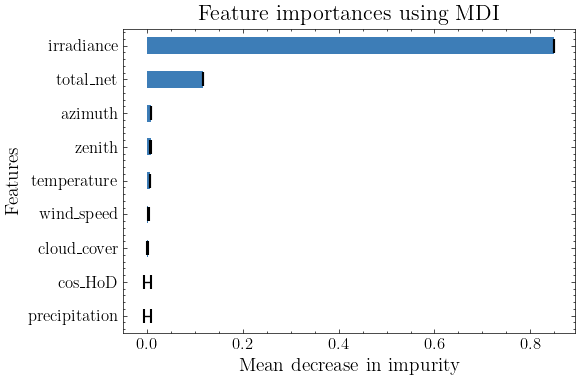

In [35]:
point_reg.tree_based_selection_MDI()

### Based on Permutation
Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set. \
https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-feature-importance
\
High-cardinality categorical features are those that have a large number of unique values, such as product IDs, zip codes, or names.

/home/jhe/prjs/envs_py/thesis-env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/jhe/prjs/envs_py/thesis-env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/jhe/prjs/envs_py/thesis-env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/jhe/prjs/envs_py/thesis-env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/jhe/prjs/envs_py/thesis-env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted w

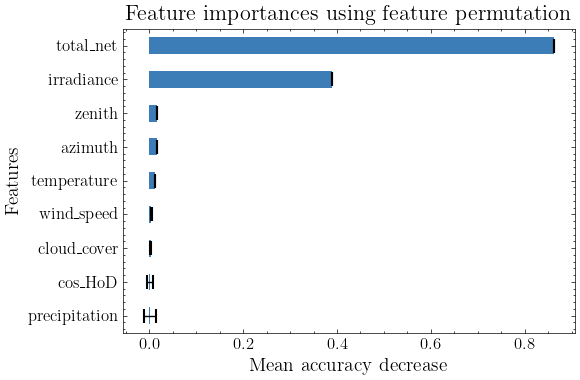

In [36]:
point_reg.tree_based_selection_permutation()

# Comparison between regressors

In [37]:
point_reg.selected_features=list_of_features_selected

Using selected features: ['irradiance_norm', 'total_net_norm', 'precipitation_norm', 'temperature_norm', 'wind_speed_norm']
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 824
[LightGBM] [Info] Number of data points in the train set: 7328, number of used features: 5
[LightGBM] [Info] Start training from score 0.262871
         R2  Adjusted R2      RMSE
0  0.953822     0.953515  0.031541
1  0.951216     0.950891  0.032419
2  0.952379     0.952062  0.032030


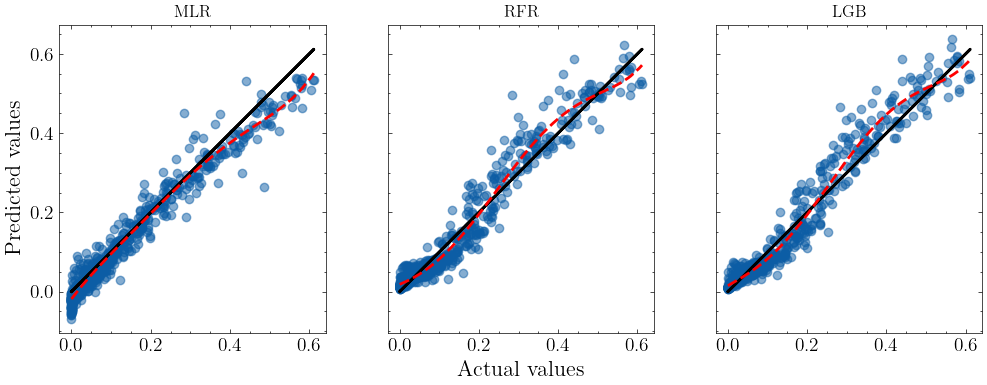

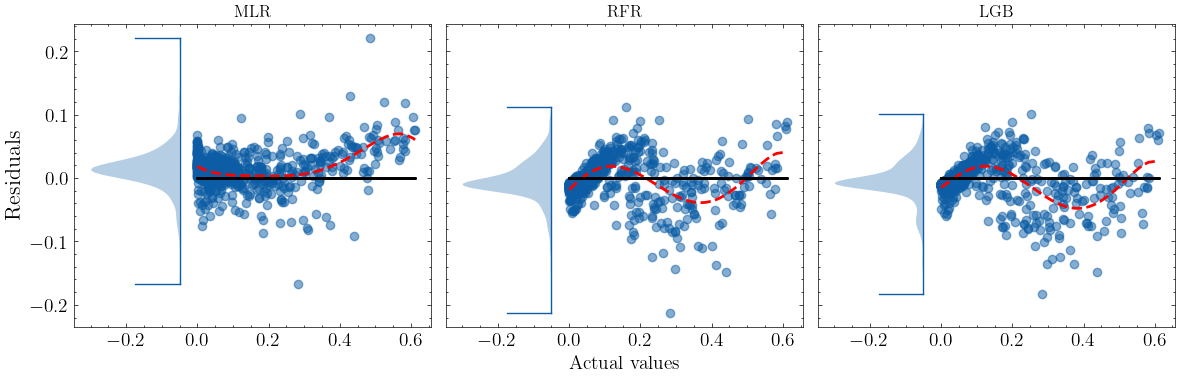

In [38]:
point_reg.compare_regressors(fname1="regressor_comparison1_more_weather_variables.pdf",fname2="regressor_comparison2_more_weather_variables.pdf")

## Visualize the results

### On Training Set

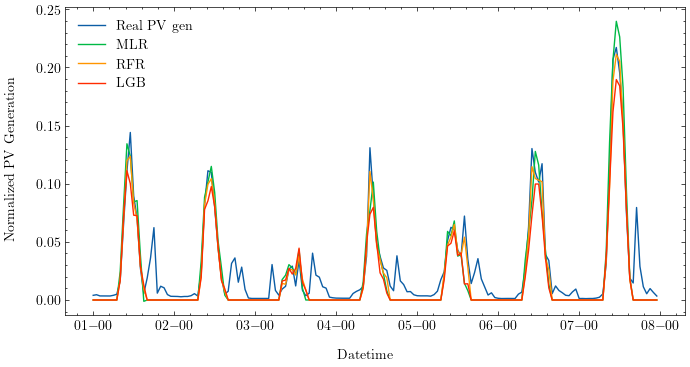

In [39]:
point_reg.visualize_results_by_dates_2018_Jan_7days(legends=['Real PV gen','MLR', "RFR","LGB"])

Too little households are available in January, so the results might not be as good as other time.

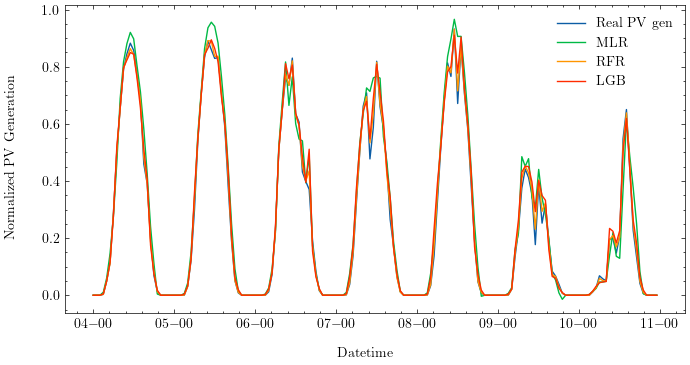

In [40]:
point_reg.visualize_results_by_dates_2018_jul_7days(legends=['Real PV gen','MLR', "RFR","LGB"])

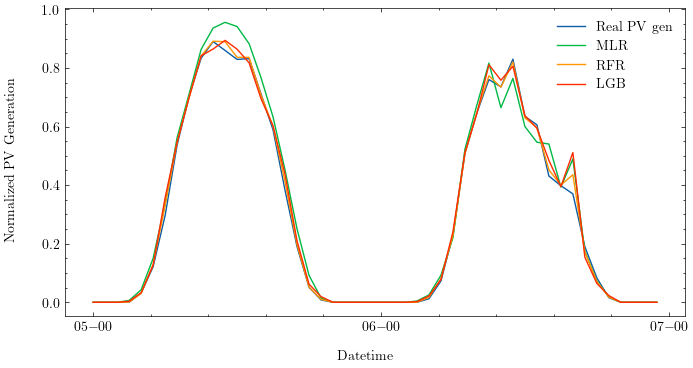

In [41]:
point_reg.visualize_results_by_dates_2018_jul_2days(legends=['Real PV gen','MLR', "RFR","LGB"])

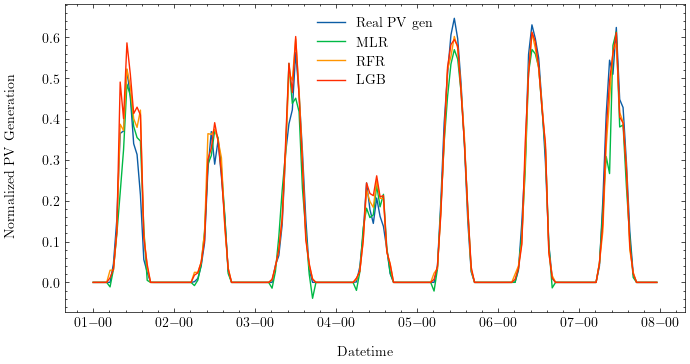

In [42]:
point_reg.visualize_results_by_dates_2018_sep_7days(legends=['Real PV gen','MLR', "RFR","LGB"])

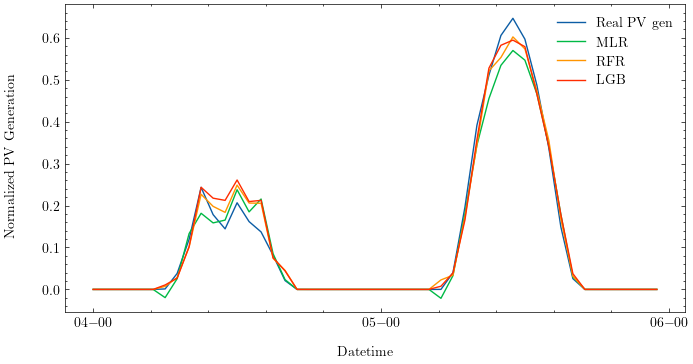

In [43]:
point_reg.visualize_results_by_dates_2018_sep_2days(legends=['Real PV gen','MLR', "RFR","LGB"])

### On Test Set

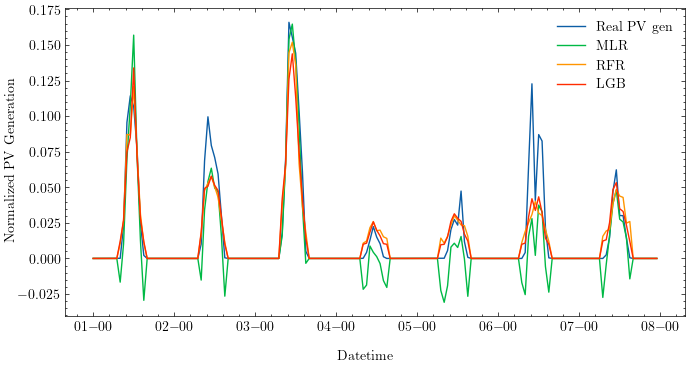

In [44]:
point_reg.visualize_results_by_dates_2019_jan_7days(legends=['Real PV gen','MLR', "RFR","LGB"])

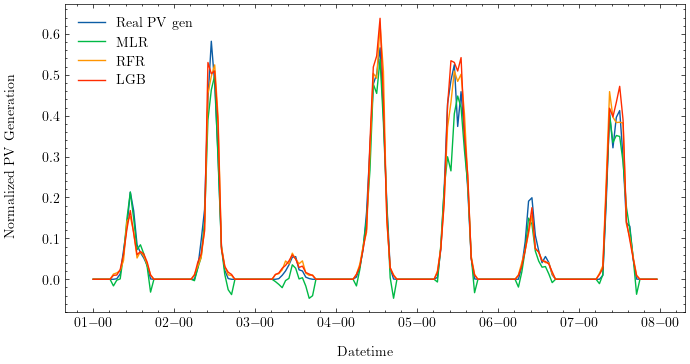

In [45]:
point_reg.visualize_results_by_dates_2019_Mar_7days(legends=['Real PV gen','MLR', "RFR","LGB"])

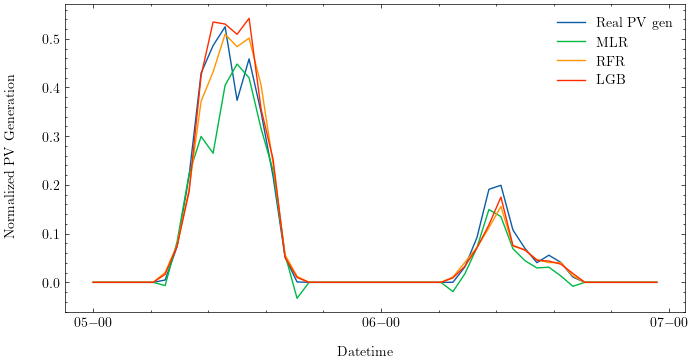

In [46]:
point_reg.visualize_results_by_dates_2019_Mar_2days(legends=['Real PV gen','MLR', "RFR","LGB"])